# $\color{green}{\text{Name: Pankaj Shah }}$ 
# $\color{green}{\text{ALY-6020: Predictive Analytics}}$ 
# $\color{green}{\text{Final Capstone Project}}$ 
# $\color{green}{\text{Instructor Andrew Long }}$

 # $\color{red}{\text{CAPSTONE PROJECT : TELECOM CHURN ANALYTICS }}$

## Introduction

<div style="text-align: justify">

We all known being in Data Analyst field how much Customer loyalty and retention matters to each industry.Customer churn in telecom industry has been defined as customer friction (Modisette,1999). In simple term to define what Customer churn would be to primarily attribute dissatisfied customers because of service they provide or could be competitors business plan.It is very crucial for any company to have more customers to float in a business. To make profit as well as for growth of any company knowing your consumers is very valueable. There are many attributes that are key to keeping customers with them. Some of them are engagement level, prodcut satisfaction etc. Many companies tries to focus on the factor that increases risk of leaving customer than keeping them engaged. We all know in modern era most of the Telecom Company like Verizon, AT&T, T-mobile, Sprint use Machine learning techniques and statistical anlaysis to predict our decision to stay or leave even before we cancel the service. Churning has huge impact on revenue of any company and especially in Telecom Business where churn rate experience 20-40%(Yung-Seop Leeb, 2006).To find out what factors increase churn risk is very crucial in Telecom Industry. My goal of choosing these datasets is to find out the possible risk factors association and to know Churn even before it happens.
</div>

### Dataset

The dataset is provided by Kaggle. It was hosted as part of competition 5 months ago. In the datasets they have splitted data into train set, test set and sample submission set. The link for the datasets can be found here. https://www.kaggle.com/c/churn-analytics-bda/data. Training set has 3333 entries and 21 variables.


## Project Definition

* Predict if the customer will Churn or Not looking at past historical data.
* Trying to find the associated probabilities? 
* We are trying to see how many Customers have Churned out.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib as plt
import matplotlib.pyplot as plt
import os
import warnings
from dfply import *
from IPython.display import Markdown
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Data Exploration

In [2]:
# load the csv into a dataframe
df = pd.read_csv('/Users/pankajshah/Desktop/churnTrain.csv')

In [3]:
# Length of the dataframe
print('Number of samples:',len(df))

Number of samples: 3333


In [4]:
# Lets look at the first 5 Rows of our datasets
df.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# count the number of rows for each type
# Lets groupby by our Output variables Churn and then see how many people do Churn at our current datasets.
df.groupby('Churn').size()

Churn
False    2850
True      483
dtype: int64

In [6]:
df.Churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

<font size="5">
     
<div class="alert alert-block alert-success">
 __Analysis__
    </div>
        </font>

Even before we start building any Feature Engineering or making some relationship between varaibles we can see that 86% of consumers do stay with their current provider so we can say large majority of Consumers are happy with the providers service but there are still 14 % of Consumers who are unhappy with the providers and they decided to leave the provider because of disliked service or because of intense competittion in certain markets. Also one thing to note is that we have classic unbalanced datasets if we start tarining our model based on these features. As our model will be 86 % right of predicting the consumer will not Churn based on high ratio of Consumers staying throuhput. So we beside chooosing Right Model to predict we also need to decide and choose our metrics correctly.

In [7]:
# Let's Convert Our boolean Churn datatypes to integer
df.Churn = df.Churn.astype(int) 

### OUTPUT LABEL

In [8]:
# create an output label to calculate Prevelance 
df['OUTPUT_LABEL'] = (df.Churn == 1).astype('int')

In [9]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

### Calculate Prevalance of Positive Class

In [10]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.145


**Q1. In relation to your project, describe what the prevalence is ?** <br>
Looking at the Prevelance Score we can see that around 14% of the Customers are Churned. 


In [11]:
# Dimension of our datasets
df.shape

(3333, 22)

<font size="4"> 
<div class="alert alert-block alert-success">

Next Step moving in Week 2: <br>
    <br>

1.Create Feature Engineering <br><br>
2.We need to know our data variables so that we can be wise in chooing best variables. <br><br>
3.Dimension of our datasets in not large. We have 3333 Rows and 22 columns.<br><br>
4.Good Thing : We don't need huge Computing power and Many Hours to build the model.<br><br>
5.Bad things: It will be hard to find the dependent relationship between the variables. <br><br>
6. Bigger the volume of data, its better to build more accurate Model.<br><br>
</div>
     </font>


In [12]:
# Lets print our Number of Column variables
print('Number of columns:',len(df.columns))

Number of columns: 22


**Q2. Briefly explore the columns and unique values of your dataset.**

In [13]:
# Lets look at all the name of column so that we could decide which column should we keep
# and which we should discard.
df.columns.values.tolist()

['State',
 'Account_Length',
 'Area_Code',
 'Phone_No',
 'International_Plan',
 'Voice_Mail_Plan',
 'No_Vmail_Messages',
 'Total_Day_minutes',
 'Total_Day_Calls',
 'Total_Day_charge',
 'Total_Eve_Minutes',
 'Total_Eve_Calls',
 'Total_Eve_Charge',
 'Total_Night_Minutes',
 'Total_Night_Calls',
 'Total_Night_Charge',
 'Total_Intl_Minutes',
 'Total_Intl_Calls',
 'Total_Intl_Charge',
 'No_CS_Calls',
 'Churn',
 'OUTPUT_LABEL']

In [14]:
# Lets break down the 22 variables into first 9 columns
df[list(df.columns)[:9]].head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls
0,KS,128,415,3824657,no,yes,25,265.1,110
1,OH,107,415,3717191,no,yes,26,161.6,123
2,NJ,137,415,3581921,no,no,0,243.4,114
3,OH,84,408,3759999,yes,no,0,299.4,71
4,OK,75,415,3306626,yes,no,0,166.7,113


In [15]:
# Columns from 9 to 17
df[list(df.columns)[9:17]].head()

,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes
0,45.07,197.4,99,16.78,244.7,91,11.01,10.0
1,27.47,195.5,103,16.62,254.4,103,11.45,13.7
2,41.38,121.2,110,10.30,162.6,104,7.32,12.2
3,50.90,61.9,88,5.26,196.9,89,8.86,6.6
4,28.34,148.3,122,12.61,186.9,121,8.41,10.1


In [16]:
# Last set of columns names
df[list(df.columns)[17:22]].head()

,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn,OUTPUT_LABEL
0,3,2.70,1,0,0
1,3,3.70,1,0,0
2,5,3.29,0,0,0
3,7,1.78,2,0,0
4,3,2.73,3,0,0


**Q3. Briefly describe your observations of the dataset**

<font size="3"> 
<div class="alert alert-block alert-success">
As I stated above in my description we can see that all of  my columns are mostly Numerical and only state is Categorical. <br><br>
Also as Column names are pretty much self Explanatory I explain as we remove or add column names and much more in feature Engineering steps.<br><br>
Let's take a look at the unique values for each column.

</div>
     </font>

In [17]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

State: 51 unique values
Account_Length: 212 unique values
Area_Code
[415 408 510]
Phone_No: 3333 unique values
International_Plan
[' no' ' yes']
Voice_Mail_Plan
[' yes' ' no']
No_Vmail_Messages: 46 unique values
Total_Day_minutes: 1667 unique values
Total_Day_Calls: 119 unique values
Total_Day_charge: 1667 unique values
Total_Eve_Minutes: 1611 unique values
Total_Eve_Calls: 123 unique values
Total_Eve_Charge: 1440 unique values
Total_Night_Minutes: 1591 unique values
Total_Night_Calls: 120 unique values
Total_Night_Charge: 933 unique values
Total_Intl_Minutes: 162 unique values
Total_Intl_Calls
[ 3  5  7  6  4  2  9 19  1 10 15  8 11  0 12 13 18 14 16 20 17]
Total_Intl_Charge: 162 unique values
No_CS_Calls
[1 0 2 3 4 5 7 9 6 8]
Churn
[0 1]
OUTPUT_LABEL
[0 1]


# Feature Engineering

**Q4. Briefly describe what 'feature engineering' is. For each feature type (e.g. numerical, categorical, etc) you have in your project, please describe what is it is. If you use one-hot encoding, please describe in your own words what that technique is.**

Feature Engineering mostly comes from domain knowledge of the subject field to create, merge and associate different variables in our datsets to build the right and most efficient model. Can be taken as fundamental unit of our Machine learning where we imply different algorithm to find the relationship between one another. <br>

Most of my datasets is Numerical and we have one Column 'State' Which is Categorical and most of the titles are pretty much self explanatory. <br>

One hot encoding is nothing but a popular technique used in Machine Learning Where we convert all our categorical data into numerical data so that it is easier for Machine to see the relationship between the variables and understand the input. Having better input will create a better output results.



<font size="3"> 
<div class="alert alert-block alert-success">
From the above unique Value Output we have to do <br><br>
1. Trim the white Space in International_plan and Voice_Mail_Plan Column so that we will not have issue later while building model<br><br>
2. Numerical Data are always better to do machine Learning than Character Variable.<br><br>
3. Good thing in our datasets we have more Numerical Variable and only one Character Varaiable which is state.<br><br>
4. We will Drop State Column as it doesnt play any relationship with rest of the variables in our these analysis.<br><br>
5. We will create two New Column Total Active Minutes and total Active charges if the consumer is actively using his cell phone through out the day.  We will see if the active minutes play any unique featres with Active Charges.<br><br>
6. Lets Recode our Yes and No Voice Mail Plan to 0 and 1. This is One Hot Encoding Step
    
    </div>
     </font>

In [18]:
# Lets look at the first value
print(df['Voice_Mail_Plan'][0])
print(df['International_Plan'][0])

 yes
 no


In [19]:
# For now lets trim the white space which we can see for data manipulation.
# For these we can use the lambda function.
df['Voice_Mail_Plan'] = df['Voice_Mail_Plan'].map(lambda x: x.strip()) # strip away white space.
df['International_Plan'] = df['International_Plan'].map(lambda x: x.strip())

In [20]:
# After trimming up the white space in above line of code we can now simply recode it to 0 and 1.
df['Voice_Mail_Plan'] = df['Voice_Mail_Plan'].map({'no':0, 'yes':1}) # Recoding 
df.International_Plan = df.International_Plan.map({'no':0, 'yes':1})

In [21]:
# Lets calculate mean grouping by Churn if we have any missing datasets then we can fill those column by Mean value.
df.groupby('Churn').mean()

,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,OUTPUT_LABEL
Churn,,,,,,,,,,,,,,,,,,,,
0,100.793684,437.074737,3.745643e+06,0.065263,0.295439,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825,0.0
1,102.664596,437.817805,3.750114e+06,0.283644,0.165631,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814,1.0


In [22]:
# Drop some useless columns which doesn't make sense and seems no relevance with the Customer Churn.
to_drop = ['State','Area_Code','Phone_No','Churn','Account_Length']
df = df.drop(to_drop, axis=1)

In [23]:
# Lets double confirm that we did drop that columns from our datasets
df.columns

Index(['International_Plan', 'Voice_Mail_Plan', 'No_Vmail_Messages',
       'Total_Day_minutes', 'Total_Day_Calls', 'Total_Day_charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'No_CS_Calls', 'OUTPUT_LABEL'],
      dtype='object')

In [24]:
# Lets create Active Minute column those who use the service more frequently.
df=df >> mutate(Active_minute = X.Total_Day_minutes+ X.Total_Eve_Minutes +X.Total_Night_Minutes)

In [25]:
# Lets also create Active Minutes Charge who use the service.
df=df >> mutate(Active_minute_charge = X.Total_Day_charge + X.Total_Eve_Charge +X.Total_Night_Charge)

In [26]:
# Lets look at all the columns once again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
International_Plan      3333 non-null int64
Voice_Mail_Plan         3333 non-null int64
No_Vmail_Messages       3333 non-null int64
Total_Day_minutes       3333 non-null float64
Total_Day_Calls         3333 non-null int64
Total_Day_charge        3333 non-null float64
Total_Eve_Minutes       3333 non-null float64
Total_Eve_Calls         3333 non-null int64
Total_Eve_Charge        3333 non-null float64
Total_Night_Minutes     3333 non-null float64
Total_Night_Calls       3333 non-null int64
Total_Night_Charge      3333 non-null float64
Total_Intl_Minutes      3333 non-null float64
Total_Intl_Calls        3333 non-null int64
Total_Intl_Charge       3333 non-null float64
No_CS_Calls             3333 non-null int64
OUTPUT_LABEL            3333 non-null int64
Active_minute           3333 non-null float64
Active_minute_charge    3333 non-null float64
dtypes: float64(10), int64(9)
memory 

<font size="3"> 
<div class="alert alert-block alert-success">
    
A few things to point out, there are some column names which makes no sense for now and doesn't seem to have any corelations with another variables that we have dropped. <br>
1.`'State',
2. 'Area_Code',
3. 'Phone_No',
4. 'Churn',
5. 'Account_Length' `<br><br>

Lets Create some features after doing Data Cleaning and triming our Datasets. Lets Add some relevant features to the datasets.

</div>
     </font>

In [27]:
# We can use the following command to filter only numeric columns
cols_num = df.select_dtypes(include=[np.number]).columns.tolist()

In [28]:
# Lets see the data types of our datasets.
df.dtypes.value_counts()

float64    10
int64       9
dtype: int64

## Numerical Features

In [29]:
# Lets print out all the column name so that we can choose our column of interest by copying and pasting
df.columns

Index(['International_Plan', 'Voice_Mail_Plan', 'No_Vmail_Messages',
       'Total_Day_minutes', 'Total_Day_Calls', 'Total_Day_charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'No_CS_Calls', 'OUTPUT_LABEL', 'Active_minute', 'Active_minute_charge'],
      dtype='object')

**Q5. Make a new dataframe that only has the columns of interest. Double check that the columns used to define your OUTPUT_LABEL are not part of cols_input!**

In [30]:
# Lets choose our column of interest. 
# We will choose all the column name accept our OUTPUT LABEL 
cols_num =['International_Plan', 'Voice_Mail_Plan', 'No_Vmail_Messages',
       'Total_Day_minutes', 'Total_Day_Calls', 'Total_Day_charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'No_CS_Calls']

## Engineering Features Summary

In [31]:
print('Total number of features:', len(cols_num))
print('Numerical Features:',len(cols_num))
# print('Categorical Features:',len(cols_all_cat))
# print('Extra features:',len(cols_extra))  

Total number of features: 16
Numerical Features: 16


<font size="3"> 
<div class="alert alert-block alert-success">
After adding new variables and removing the irrelevant columns we have total of 16 Variables to work with.

</div>
     </font>

### Let's check if we are missing any data.

In [32]:
df[cols_num].isnull().sum().sort_values(ascending = False)

No_CS_Calls            0
Total_Intl_Charge      0
Total_Intl_Calls       0
Total_Intl_Minutes     0
Total_Night_Charge     0
Total_Night_Calls      0
Total_Night_Minutes    0
Total_Eve_Charge       0
Total_Eve_Calls        0
Total_Eve_Minutes      0
Total_Day_charge       0
Total_Day_Calls        0
Total_Day_minutes      0
No_Vmail_Messages      0
Voice_Mail_Plan        0
International_Plan     0
dtype: int64

<font size="3"> 
<div class="alert alert-block alert-success">
    
1. So looking at above code we don't have to deal with any Non Missing varaibles and need to impute which is very good interms of model building. <br> <br>
2. We are not adding any bias for missing data. We don't have to impute any non missing datasets. <br> <br>
3. Next Step is to make a new dataframe with our Column of our interest.<br> <br>

</div>
     </font>

In [33]:
cols_input = cols_num 
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [34]:
# Lets look at the head so that we can see if we have only one OUTPUT LABEL
# Lets Transpose so that we can see all the column and the values at a glance
df_data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
International_Plan,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
Voice_Mail_Plan,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
No_Vmail_Messages,25.00,26.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,37.00,0.00,0.00,0.00,0.00,0.00
Total_Day_minutes,265.10,161.60,243.40,299.40,166.70,223.40,218.20,157.00,184.50,258.60,129.10,187.70,128.80,156.60,120.70
Total_Day_Calls,110.00,123.00,114.00,71.00,113.00,98.00,88.00,79.00,97.00,84.00,137.00,127.00,96.00,88.00,70.00
Total_Day_charge,45.07,27.47,41.38,50.90,28.34,37.98,37.09,26.69,31.37,43.96,21.95,31.91,21.90,26.62,20.52
Total_Eve_Minutes,197.40,195.50,121.20,61.90,148.30,220.60,348.50,103.10,351.60,222.00,228.50,163.40,104.90,247.60,307.20
Total_Eve_Calls,99.00,103.00,110.00,88.00,122.00,101.00,108.00,94.00,80.00,111.00,83.00,148.00,71.00,75.00,76.00
Total_Eve_Charge,16.78,16.62,10.30,5.26,12.61,18.75,29.62,8.76,29.89,18.87,19.42,13.89,8.92,21.05,26.11
Total_Night_Minutes,244.70,254.40,162.60,196.90,186.90,203.90,212.60,211.80,215.80,326.40,208.80,196.00,141.10,192.30,203.00


# Building Training/Validation/Test Samples

** Q6. In your own words, describe what are training / validation and test samples used for?**

Training datasets are set of datasets where we let our model learn from certain set of our historical datasets.

Validation datasets are datasets which we hold and keep aside before we train our model with a set of dataset. 

Test datasets is where we evaluate our model is. how good our Model does in unseen datasets after learning and implying training and validatation datasets.

Lets say we have 100 Rows of data X. We will train to build our model using 70-80% of our datasets. Then rest 20% of remaining datasets can be witheld to validate and whatever remains after validate we can choose that percentage to evaluate how good our model is.

<font size="3"> 
<div class="alert alert-block alert-success">
    
The whole Goal of our Project is to find out how can we decrease our Churn ratio so that we can keep our valuable consumers  from loosing and being unhappy so that business is always in profit. So lets train our Model with different condition. We will create some variables for prediction. We will have only numerical features as we have dropped all categorical features while doing feature enginerring.

</div>
     </font>


In [35]:
# Lets get Some info about the datasets before we build model
# Sanity  check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
International_Plan      3333 non-null int64
Voice_Mail_Plan         3333 non-null int64
No_Vmail_Messages       3333 non-null int64
Total_Day_minutes       3333 non-null float64
Total_Day_Calls         3333 non-null int64
Total_Day_charge        3333 non-null float64
Total_Eve_Minutes       3333 non-null float64
Total_Eve_Calls         3333 non-null int64
Total_Eve_Charge        3333 non-null float64
Total_Night_Minutes     3333 non-null float64
Total_Night_Calls       3333 non-null int64
Total_Night_Charge      3333 non-null float64
Total_Intl_Minutes      3333 non-null float64
Total_Intl_Calls        3333 non-null int64
Total_Intl_Charge       3333 non-null float64
No_CS_Calls             3333 non-null int64
OUTPUT_LABEL            3333 non-null int64
Active_minute           3333 non-null float64
Active_minute_charge    3333 non-null float64
dtypes: float64(10), int64(9)
memory 

<font size="3"> 
<div class="alert alert-block alert-success">

So after we did Sanity Check.<br><br>
Lets Split our datasets into three categories:<br><br>
- Training Set: As name Suggest We will train our Model with 65 % of our datasets<br><br>
- Validation Set: We will validate, how better our model does with 20 % of our datasets.<br><br>
- Test Set: We will keep 15 % of datasets from our model to test the result and measure our performance.<br><br>

So far we have explored our data and created features from the only numerical measure how well your model would do on unseen data. We split into three parts:<br><br>

Summary:<br><br>
- 70% train<br><br>
- 15% validation<br><br>
- 15% test.<br><br>

Lets Shuffle the Sample so that there is not any particular order that our model learns to decide Churn.
Lets keep Positive Sample on top.<br><br>

Extract 30% of the data for Validation/ test Split.

</div>
     </font>

In [36]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)
df_data.head()

,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,OUTPUT_LABEL
0,0,0,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1,0
1,0,0,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0,0
2,0,0,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
3,0,0,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1,0
4,0,0,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1,0


** Q7. Create a training (df_train_all), validation (df_valid) and test (df_test) set.**

In below steps we will createtraining (df_train_all), validation (df_valid) and test (df_test) set.

In [37]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.35,random_state=42)

print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.350


<font size="3"> 
<div class="alert alert-block alert-success">

And now split into test and validation using 37% fraction. 
</div>
     </font>

In [38]:
df_test = df_valid_test.sample(frac = 0.37, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)


<font size="3"> 
<div class="alert alert-block alert-success">
Lets drop rows from our df_test datasets so that those row will never be part of our training or validating sample.
 
</div>
     </font>

In [39]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

<font size="3"> 
<div class="alert alert-block alert-success">

After dropping the rows lets calculate the Prevelance Score.
If the prevelance score is close for test sets, validated sets and train sets the model is more better than having huge disparancies.
</div>
     </font>


In [40]:
print(calc_prevalence(df_test.OUTPUT_LABEL.values))
print(calc_prevalence(df_valid.OUTPUT_LABEL.values))
print(calc_prevalence(df_train_all.OUTPUT_LABEL.values))

0.13657407407407407
0.1306122448979592
0.15143120960295475


<font size="3"> 
<div class="alert alert-block alert-success">
    
By tweaking more or less I can come close to 0.136 for test Output Labels  and 0.130 for validate output Labels and for the training Output labels it came close to 0.151. I think these is the best i can come with splitting into validate and test sets.
</div>
     </font>

In [41]:
print(len(df_test)) # lets print the length of train category
print(len(df_valid))   # lets print the length of validate category
print(len(df_train_all))  # lets print the length of train all category

432
735
2166


In [42]:
print("Test prevalence(n = %d):%.3f"%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 432):0.137
Valid prevalence(n = 735):0.131
Train all prevalence(n = 2166):0.151


In [43]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math did work but why?'

all samples (n = 3333)


** Q8. Take your df_train_all and create a balanced dataset. Briefly explain in your own words why we need to balance and a few techniques for balancing the dataset.**

Imbalance data: Where number of Observation is not equal. <br>
In Practical case scenario these is very common. <br>
None of the datasets come with balance ratio of positive and negative.<br>  
There are some ways to prevent the unbalance datasets . <br>
We learn in Week 2.<br>
Some of those techniques are undersampling (Removal of some data), oversampling (increase numbers of minority class in your datasets), synthetic data generation and cost sensitive learning.<br>
Balanced data will lead the model to be not bias on majority and let treat all column equally. If we have one dominate class of 90 % then our model will be biased stating True and get right atleast 90%.But if we have balanced our datasets before training. The results and output are not skewed because of Unbalanced datasets to begin with.

In [44]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 656):0.500


**Q9. Save all 4 dataframes to csv and the cols_input**

In [45]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

** Q10.fill any missing values with the mean value.**

We don't have any Missing Variables so we don't need to do this step.

In [46]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [47]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [48]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [49]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,International_Plan,0.104801
1,Voice_Mail_Plan,0.278393
2,No_Vmail_Messages,8.185134
3,Total_Day_minutes,179.106602
4,Total_Day_Calls,100.117729


In [50]:
# Most machine learning packages like to use an input matrix X and output vector y, so let's create those:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (2166, 16)
Training shapes: (656, 16) (656,)
Validation shapes: (735, 16) (735,)


<font size="3"> 
<div class="alert alert-block alert-success">
    
After looking at the output we might need to scale our data so that we by doing Standard Scale we can remove mean and scale variance.
    </div>
     </font>

**Q11. create a scalar, save it, and scale the X matrices**

In [51]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
# We will need this scaler for the test data, so let's save it using a package called pickle.
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [53]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [54]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection¶

**Q12. Briefly describe what this section does. It will change as we learn more about machine learning.**


<font size="3"> 
<div class="alert alert-block alert-success">
    
Model Selection is very important to select based on our category.<br> <br>
As we have spend most of our time in data cleaning, munging. <br> <br>
Training our model with limited datasets and then validating it.<br> <br>

Now its time to train few of the popular Model and do some fine tunning to boost the performance. 

</div>
     </font>

In [55]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

**Q13. Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive.**


### Setting threshold to 0.5  to label a predicted sample as positive.


In [56]:
thresh = 0.5

# Model Selection: baseline models

<font size="3"> 
<div class="alert alert-block alert-success">
    
Lets test all 7 Models that we learn as part of predictive Analytics class to test the models and see which one will be best to use. <br><br>

For all our Models we will keep default parameters and then after looking  at the result we will see by tweaking some of the parameters if we can get some best results. But for now we will keep default parameters.<br><br>

</div>
     </font>

# 1. K nearest neighbors (KNN)

![title](https://www.python-course.eu/images/nearest_neighbor_people.png)

<div style="text-align: right">**Image Source: https://www.python-course.eu/images/nearest_neighbor_people** </div>


** Q14. Briefly describe how KNN works in your own words.**

<font size="3"> 
<div class="alert alert-block alert-success">
    
Simplest Classification Algorithm  as it is consumes less time and easy to built in and to intepret its result.<br><br>
Often called as Lazy learning Algorithm which is good place to start.<br><br>
It is known for not making any assumption of our underlying datasets.<br><br>
Beside its little complex Math it needs very minimal training even before we validate our dataset. Could be taken as benchmark to build other models and Compare.<br><br>

Based on our K value parameter our results will change. It is nothing but can be taken as average of all the numerical targets to closet Neighbors.<br><br>

</div>
     </font>
 

** Q15. Train a KNN and evaluate performance**

In [57]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [58]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.887
accuracy:0.785
recall:0.634
precision:0.908
specificity:0.927
prevalence:0.500
 
Validation:
AUC:0.864
accuracy:0.882
recall:0.708
precision:0.535
specificity:0.900
prevalence:0.131
 


<font size="3"> 
<div class="alert alert-block alert-success">
    
    
__Our First Model : KNN Analysis__ <br> <br>
    We have AUC 0.88 % in Training Datasets whereas we have less AUC score in Our validation datasets.It decrease by 0.02%. If we compare Accuracy then it has definetly gone up from 78 % to 88%.<br> <br>
    In validation datasets it is being more accuarte about it. Also Precision has dropped from 0.90 to 0.535. When it predicts the positive result, how often is it correct?  <br> <br>
    We Must also Remember that we have set our treshold datasets to 0.5 <br> <br>
    Lets see if any other variables have any correlation for future model fine tunning.
    
    </div>
     </font>
 

In [59]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
International_Plan,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
Voice_Mail_Plan,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
No_Vmail_Messages,25.00,26.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,37.00,0.00,0.00,0.00,0.00,0.00
Total_Day_minutes,265.10,161.60,243.40,299.40,166.70,223.40,218.20,157.00,184.50,258.60,129.10,187.70,128.80,156.60,120.70
Total_Day_Calls,110.00,123.00,114.00,71.00,113.00,98.00,88.00,79.00,97.00,84.00,137.00,127.00,96.00,88.00,70.00
Total_Day_charge,45.07,27.47,41.38,50.90,28.34,37.98,37.09,26.69,31.37,43.96,21.95,31.91,21.90,26.62,20.52
Total_Eve_Minutes,197.40,195.50,121.20,61.90,148.30,220.60,348.50,103.10,351.60,222.00,228.50,163.40,104.90,247.60,307.20
Total_Eve_Calls,99.00,103.00,110.00,88.00,122.00,101.00,108.00,94.00,80.00,111.00,83.00,148.00,71.00,75.00,76.00
Total_Eve_Charge,16.78,16.62,10.30,5.26,12.61,18.75,29.62,8.76,29.89,18.87,19.42,13.89,8.92,21.05,26.11
Total_Night_Minutes,244.70,254.40,162.60,196.90,186.90,203.90,212.60,211.80,215.80,326.40,208.80,196.00,141.10,192.30,203.00


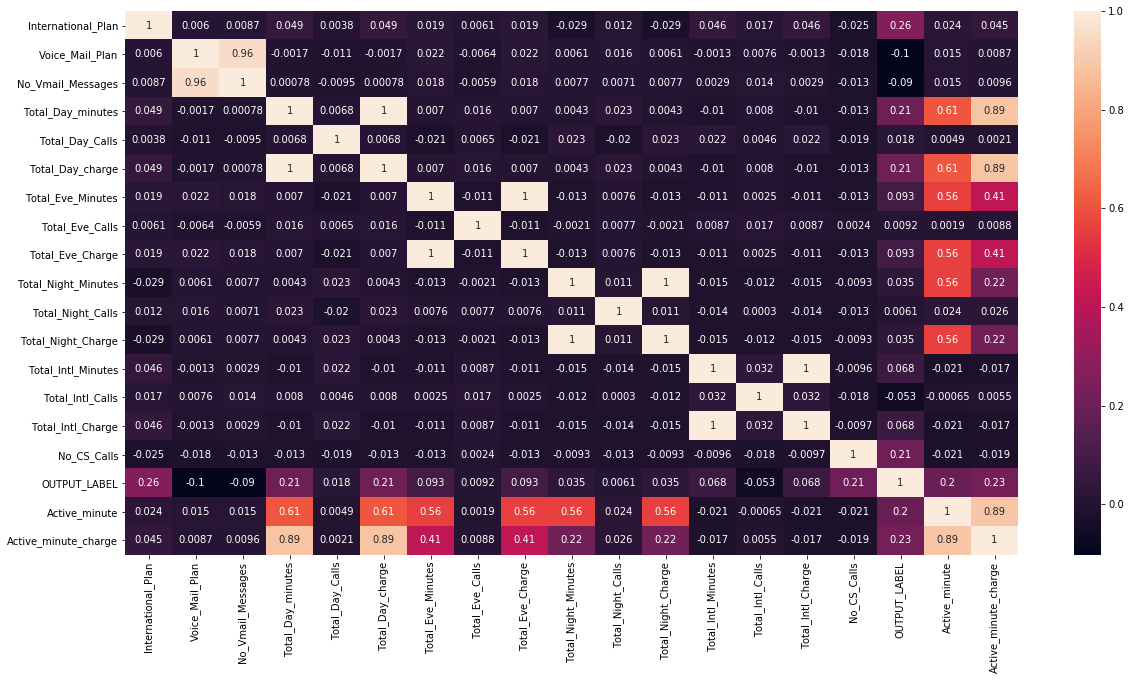

In [60]:

# Lets define all if there is any correlation  between various column names. We will represent interms of chart.
def find_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr,  # Show correlation
                    xticklabels=corr.columns.values, # x ticks labels
                    yticklabels=corr.columns.values, # y ticks labels
                    annot=True)
    return corr

correlation_df = find_correlations(df,show_chart=True)

## 2. Logistic regression¶


![title](https://cdn-images-1.medium.com/max/1600/1*CfV_EAgUO1zcRusrWhXIfg.jpeg)

<div style="text-align: right">**Source : https://cdn-images-1.medium.com/max/1600/1*CfV_EAgUO1zcRusrWhXIfg ** </div>

**Q16. Briefly describe how logistic regression works in your own words.**

<font size="3"> 
<div class="alert alert-block alert-success">

Predictive Analyis for generealised linear model.<br><br>
Usually good to find relationship between one dependent and other independeent variable.<br><br>
Outcome is measured : Dichtomous varaible.<br><br>
Machine helps us to find the relationship betweeen variables. <br><br>
Easy to implement but sometime very difficlut to train based on our sample size of data.
    <br>
    </div>
     </font>
 

In [61]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Q17. Train a logistic regression and evaluate the performance**

In [62]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.842
accuracy:0.780
recall:0.768
precision:0.787
specificity:0.793
prevalence:0.500
 
Validation:
AUC:0.799
accuracy:0.770
recall:0.740
precision:0.330
specificity:0.775
prevalence:0.131
 


<font size="3"> 
<div class="alert alert-block alert-success">

Lets Understand the meaning of the output to interpret the results.<br><br>

1. Accuracy : How often is the classifier correct? <br><br>
2. Precision : When it predicts the positive result, how often is it correct? <br><br>
3. Recall: When it is actually the positive result, how often does it predict correctly? <br><br>
4. Precision: How many of the returned hits were true positive or simply how many of the found were correct hits.<br><br>
5. Specificity: When the actual value is negative, how often is the prediction correct?<br><br>
              : Proportion of actual negative cases, which got predicted correctly. <br><br>
              
</div>
     </font>

<font size="3"> 
<div class="alert alert-block alert-success">
    
    
__Our Second Model : KNN Analysis__ <br> <br>
    We don't have any promising good results from our Second model as well. <br> <br>
    We have AUC 0.84 % in Training Datasets whereas we have less AUC score in Our validation datasets.It decrease by 0.02%. <br> <br>
    If we compare prevelance then it has definetly drop down up from 0.5 to 0.13.<br> <br>
    In validation datasets it is being more accuarte about it. Also Precision has dropped from 0.78 to 0.335. When it predicts the positive result, how often is it correct?  <br> <br>
    We Must also Remember that we have set our treshold datasets to 0.5 <br> <br>
    Lets see if any other variables have any correlation for future model fine tunning.<br> <br>
    
    Recall limits the number of false negatives.Which in our second model is not changed much. <br> <br> 
    
     For each 100 Customer Churn that is classified, 79 were correctly classified as Churned or not Churned
    </div>
     </font>

<font size="3"> 
<div class="alert alert-block alert-success">
    
1.As we know by now that The higher the precision, the lower the recall and vice versa.<br><br>
2.We can fine tune our  precision and recall of the existing  Logistics Regression model.<br><br>
3.If we incresed the threshold then it will typically increase precision and decrease recall.<br><br>


Lets Move to our remaining Model to see the better result and AUC score to determine if we could get to our end goal. 
</div>
     </font>

## 3. Stochastic Gradient Descent

![](https://cdn-images-1.medium.com/max/1600/1*Sa5kGcZIVNTLjrI8P-YsSQ.gif)

<div style="text-align: right">**Source : https://cdn-images-1.medium.com/max/1600/1*Sa5kGcZIVNTLjrI8P-YsSQ ** </div>


**Q18. Briefly describe how stochastic gradient descent works in your own words.**

<font size="3"> 
<div class="alert alert-block alert-success">
    
It uses only a single example usually refered to as batch Size per iteration to build and train our Model. <br><br><br>
Stochastic Gradient Descent is a multiplication of gradient descent.<br><br>
Optimize by updating a set of parameters. <br><br>
Minimize the error of cost function <br><br>
If we provide lot of batch size it works may be the best but it will also be very noisy.<br><br>
Gradually decrease the learning rate as it passes through many trainings.

</div>
     </font>

**Q19. Train a stochastic gradient descent model and evaluate the performance**

In [63]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.840
accuracy:0.785
recall:0.774
precision:0.791
specificity:0.796
prevalence:0.500
 
Validation:
AUC:0.800
accuracy:0.769
recall:0.740
precision:0.329
specificity:0.773
prevalence:0.131
 


<font size="3"> 
<div class="alert alert-block alert-success">
    
    
__Our Third Model : Stochastic Gradient Descent__ <br> <br>
We don't have any promising good results from our third model as well.Although AUC score for validation test drop from 84 % to 80% <br> <br>
We have AUC 0.84 % in Training Datasets whereas we have less AUC score in Our validation datasets.It decrease by 0.4%. <br> <br>
If we compare prevelance then it has definetly drop down up from 0.5 to 0.13.<br> <br>
In validation datasets it is being more accuarte about it. Also Precision has dropped from 0.79 to 0.329. When it predicts the positive result, how often is it correct?  <br> <br>
We Must also Remember that we have set our treshold datasets to 0.5 <br> <br>
Lets see if any other variables have any correlation for future model fine tunning.<br> <br>
Also Precission has dropped in our SGD model <br><br>
Recall limits the number of false negatives.Which in our third model is not changed much. <br> <br> 
    

</div>
     </font>

## 4. Naive Bayes¶

![](https://www.researchgate.net/profile/Yune_Lee/publication/255695722/figure/fig1/AS:297967207632900@1448052327024/Illustration-of-how-a-Gaussian-Naive-Bayes-GNB-classifier-works-For-each-data-point.png)

<div style="text-align: right">**Source: https://www.researchgate.net/profile/Yune_Lee/publication/255695722/figure** </div>


**Q20. Briefly describe how naive bayes works in your own words.**

<font size="3"> 
<div class="alert alert-block alert-success">

Lets see What does Naive Bayes has to offer for our analysis. In this model we will be using Naive Bayes Classifier to identify our main goal identifying Customer Churn. <br><br>
- Calculate the probability of our defined hypothesis based on reference to prior knowledge. <br><br>
- Feed the datasets into X_Train and Y_train in our Validation set.<br><br>
- Model to be used to implement : GaussianNB of sklearn.<br><br>
- Based on Bayes Theorem <br><br>
- We should remove highly Correlated features becuase they will play high corelation and lead to over inflating our model.

</div>
     </font>

**Q21.Train naive bayes model and evaluate the performance**

In [65]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


Naive Bayes
Training:
AUC:0.863
accuracy:0.823
recall:0.790
precision:0.846
specificity:0.857
prevalence:0.500
 
Validation:
AUC:0.826
accuracy:0.824
recall:0.781
precision:0.410
specificity:0.831
prevalence:0.131
 


<font size="3"> 
<div class="alert alert-block alert-success">
    
__Our Fourth Model : Naive Bayes using GaussianNB__ <br> <br>
We don't have any promising good results from our third model as well.Although AUC score for validation test drop from 84 % to 80% <br> <br>
We have AUC 0.84 % in Training Datasets whereas we have less AUC score in Our validation datasets.It decrease by 0.4%. <br> <br>
If we compare prevelance then it has definetly drop down up from 0.5 to 0.13.<br> <br>
In validation datasets it is being more accuarte about it. Also Precision has dropped from 0.79 to 0.329. When it predicts the positive result, how often is it correct?  <br> <br>
We Must also Remember that we have set our treshold datasets to 0.5 <br> <br>
Lets see if any other variables have any correlation for future model fine tunning.<br> <br>
Also Precission has dropped in our SGD model <br><br>
Recall limits the number of false negatives.Which in our third model is not changed much. <br> <br> 
    

</div>
     </font>

## 5. Decision Tree Classifier¶

![](https://cdn-images-1.medium.com/max/1600/0*0dN6d8THyImxwPeD.png)

<div style="text-align: right">**Source: https://cdn-images-1.medium.com/max/1600/0*0dN6d8THyImxwPeD** </div>


**Q22. Briefly describe how decision tree model works in your own words.**

<font size="3"> 
<div class="alert alert-block alert-success">

Lets Move to our Fifth Model. After Looking at the result from Naive Bayes Algorithm we are looking at Decision Tree Classifier where we can divide our dataets based on factors to decide whether it will increase the likelihood of Churn. <br><br>
As in Decision Tree Classifier we are dividing customers into yes/no. <br><br>

1. Decission Support tool.<br><br>
2. Use tree like decission Model.<br><br>
3. Good to think as Conditional Control Statements.<br><br>
4. Each Node represents Point of Decision for the Model.<br><br>
5. To understand Simple We can just say “.. if .. then .. else ..”
</div>
     </font>


**Q23. Train decision tree model and evaluate the performance**

In [67]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [68]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.991
accuracy:0.974
recall:0.951
precision:0.997
specificity:0.994
prevalence:0.500
 
Validation:
AUC:0.841
accuracy:0.846
recall:0.844
precision:0.453
specificity:0.842
prevalence:0.131
 


### Analysis

<font size="3"> 
<div class="alert alert-block alert-success">
    
__Our Fifth Model : Decision Tree Classifier__ <br> <br>
Our AUC score for training set is 0.99 which seems perfect which is close to 1. But when it test it in validate test we can see most of it was overfitted.<br> <br>
The Accuracy also fail down from 0.97 to 0.84 which indicates it was overfitting based on our datasets.<br> <br>
If we look into precission it fell almost to the half.<br> <br>
Recall limits the number of false negatives.Which in our fifth model is changed by almost 10%. <br> <br> 
</div>
     </font>

## 6. Random Forest¶

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)

<div style="text-align: right">**Source : http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq** </div>

**Q25.Briefly describe how random forest model works in your own words**

<font size="3"> 
<div class="alert alert-block alert-success">

Supervised Learning algorithm <br><br>
Usually used for both classification and Regression problems.<br><br>
Similar to decision Tree but it more robust as we have more trees like bunch of trees thats why it is called forest.<br><br>
Helps us to pick relative importnat features.<br><br>
There is disadvantage of being slow as there are multiples node/ decision to be made.<br><br>
Difficult to interpret as compare to our fifth Model Decision Tree Classifier.

</div>
     </font>


**Q27.Train random forest model and evaluate the performance.**

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [70]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.974
accuracy:0.934
recall:0.899
precision:0.967
specificity:0.970
prevalence:0.500
 
Validation:
AUC:0.896
accuracy:0.854
recall:0.844
precision:0.468
specificity:0.856
prevalence:0.131
 


<font size="3"> 
<div class="alert alert-block alert-success">
    
__Our sixth Model : Random Forest__ <br> <br>
Lets See how our Sixth Model did interms of AUC score. <br> <br>
Our AUC score for training set is 0.97 which seems perfect which is close to 1. But when it test it in validate dataset we can see most of it was overfitted.<br> <br>
The Accuracy also fail down from 0.93 to 0.85 which indicates it was overfitting based on our datasets.<br> <br>
If we look into precission it fell almost to the half. 0.96 to 0.46<br> <br>
Recall limits the number of false negatives.Which in our sixth model is changed by almost 5%. <br> <br> 
</div>
     </font>

## 7. Gradient Boosting Classifier

![](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/02/Gradient-Boosting-Algorithm-01.jpg)


<div style="text-align: right">**Source: https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/02/Gradient-Boosting-Algorithm-01** </div>
 

**Q28. Briefly describe how gradient boosting classifier model works in your own words.**

<font size="3"> 
<div class="alert alert-block alert-success">
Gradient Boosting Classifier is very important and most informative technique used to classify regression and classification problem.<br><br>
    
So far we have no luck in getting higher accuracy score in our past sixth model. <br><br>
By Using Gradient Boosting Classfier we can boost those either in our feature engineering step or by applying some of the boosting algorithm to our Telecom Datasets. <br><br>
As we think we have already did lot of feature engineering lets try to apply Gradient Descent Classifier directly to our datasets and see if these changes anything in our validation set model.<br><br>
often refered to as black box.<br><br>

Xgboost of Gradient Descent is regarded as very fast and most accurate than any other traditional gradient boosting model is.
    
</div>
     </font>

**Q29. Train gradient boosting model and evaluate the performance.**

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [72]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.885
accuracy:0.848
recall:0.833
precision:0.455
specificity:0.850
prevalence:0.131
 


<font size="3"> 
<div class="alert alert-block alert-success">
    
__Our seventh Model : Gradient Boosting Classifier__ <br> <br>
Lets See how our Seventhh Model did interms of AUC score. <br> <br>
Our AUC score for training set is perfect 1. Which seems perfect But when it test it in validate dataset we can see most of it was overfitted as model lear to fit more.<br> <br>
The Accuracy also fail down from perfect 1.00 to 0.84 which indicates it was overfitting based on our datasets.<br> <br>
If we look into precission it fell almost to the half. 1.00 to 0.45<br> <br>
Recall limits the number of false negatives.Which in our seventh model is changed by almost 17%. <br> <br> 
</div>
     </font>    

## Analyze results baseline mode

In [73]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

**Q30.Pick one performance metric that you will use for picking the best model. Explain your choice of performance metric. Make a bar plot of this performance metric below to demonstrate the baseline performance.**

Based on AUC Score and looking at the best Parameter I think Random Forest Seems much more suiatble for my model. Although Gradient Bossting Classifier seems much higher result. We also saw that it did poorly on validate set compare to Random Forest. There is huge gap which you can see in graph ploted below the difference between trainning and validating sets. The AUC Score for Random Forest is 97 % for Training sets and 89 % for Validation set which is much higher than our rest of the models.  

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

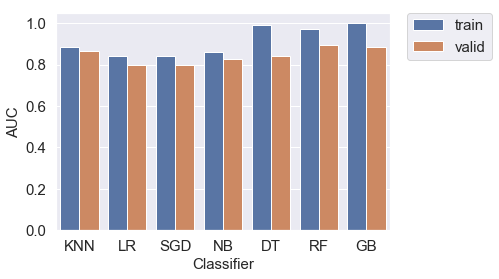

In [75]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

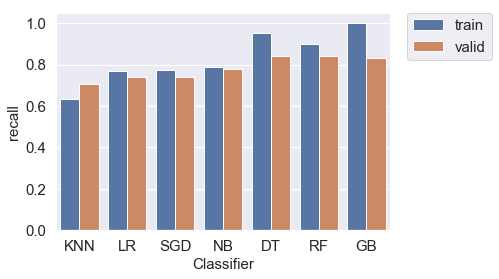

In [76]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

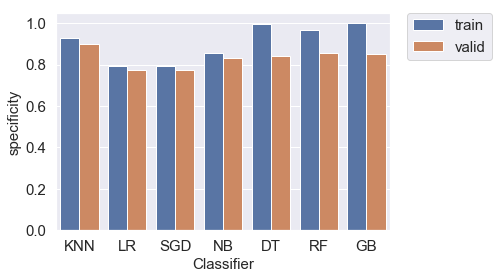

In [77]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

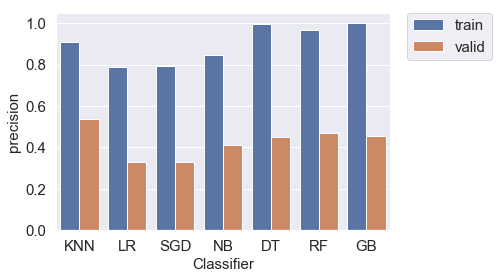

In [78]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

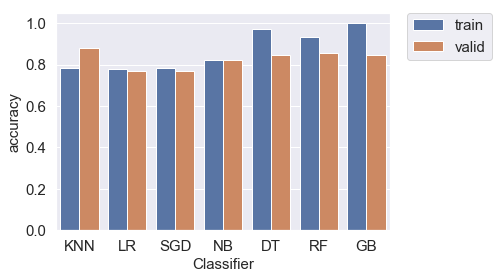

In [79]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

**Q30.Pick one performance metric that you will use for picking the best model. Explain your choice of performance metric. Make a bar plot of this performance metric below to demonstrate the baseline performance.**

<font size="3"> 
<div class="alert alert-block alert-success">
    
We have done great work on training our model and testing it in validating sets but we have done our job yet.<br><br>
Based on all the graphs that we have created we need to select best algorithm.<br><br>
Our goal when we start our Project was to get threshold value closer to one meaning predicting each custumer before it churns. <br><br>
We need to boost more True positive by minimising True Negative.<br><br> 
We also need to remember that we have set our treshhold value to 0.5 for alll our models that we build.<br><br>
So what does setting up the treshold value to 0.5 means is that we are just converting our predicted probability into class predictions.<br><br>
Some of the important features we should look into to address our Customer Churn Analysis would be to look into Specificity, sensitivity from all the models.

</div>
     </font>  

# Model Selection: Learning Curves¶

Learning Curve Model from Scikit Learn Websites.

**Q31. Using your baseline model that has the best performance on the validation set, plot a learning curve for that model.**

In [80]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

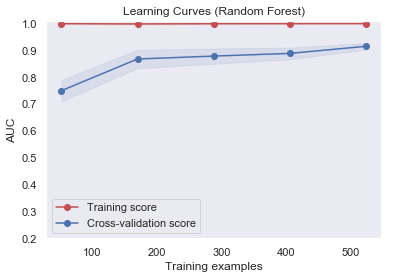

In [81]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

**Q32.Identify if your model has high variance or high bias. Briefly discuss what techniques could be used to improve performance of that model.**

large difference between the training and validation scores: High variance <br>
A sign of overfitting <br>

Looking at the plot above My Model has High Variance than High Bias. <br>
I Could reduce the High Bias in my model by adding
 - some new features, 
 - increase the complexity of the model rather than having simple model.
 - We can also try Reducing Regularization and change model architecture to reduce underfitting.
 - I look into inspire new feature ideas and try to make my model complicated to decrease variance.

**Q33. Plot the feature importance for logistic regression and random forest models here.**

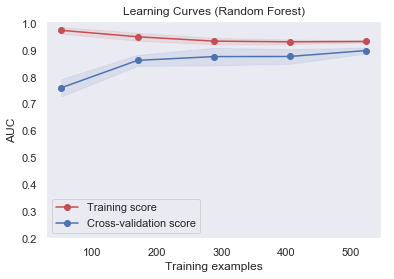

In [82]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 3, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

In the first graph plotted above we can see that there is some difference between training and validation scores compare to second one.

# Feature Importance: logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [85]:
feature_importances.head()

,importance
International_Plan,0.860908
No_CS_Calls,0.809180
Total_Day_charge,0.367032
Total_Day_minutes,0.364059
Total_Eve_Minutes,0.164832


Looking at the output of the results from Logistic Regression 

For logistic regression,<br>

the variables with highest positive coefficients are predictive of Churn <br>
and the variables with highest negative coefficients are predictive of not being Churn. 

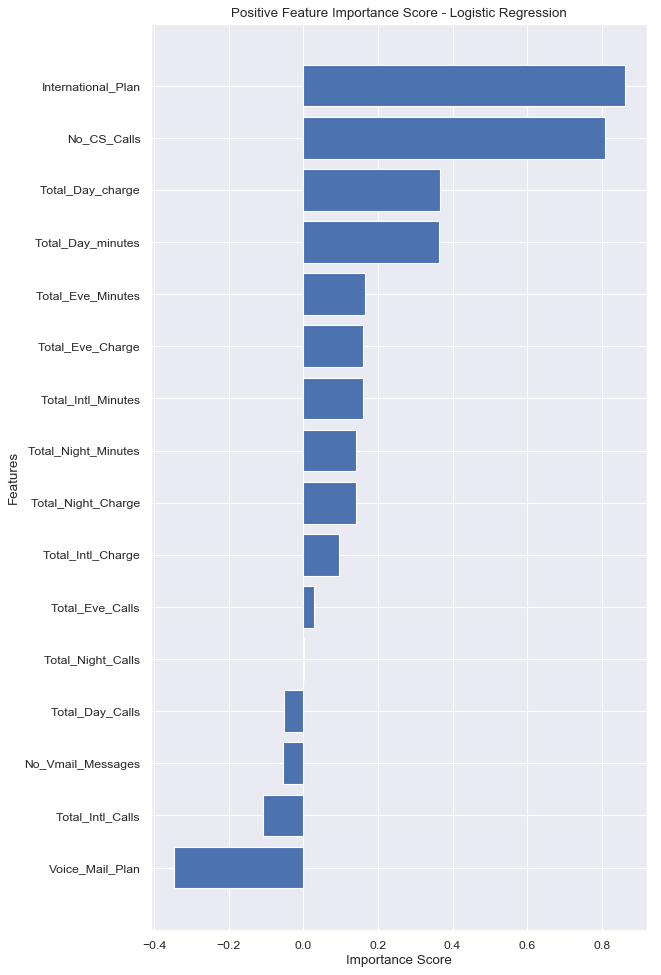

In [86]:
# We can plot the top 50 for each direction below.
# Note that if you don't have a lot of features, this may show the negative coefficients too.

num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

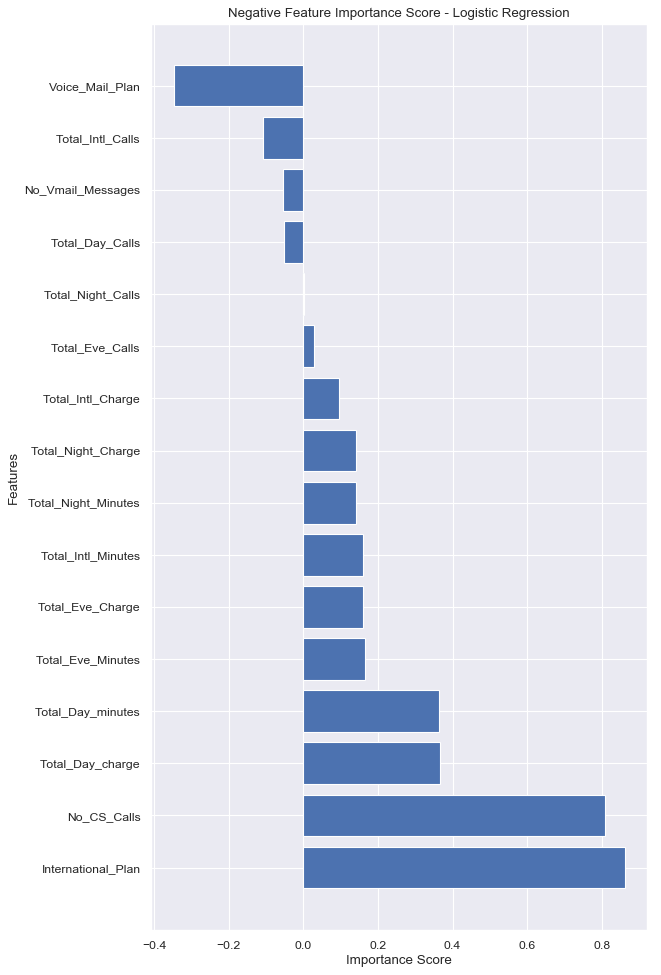

In [87]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

# Model Selection: random forest

<font size="3"> 
<div class="alert alert-block alert-success">
    
To select the Model using the Random Forest we can do more investigation on our Random Forest or Alternative gradient Bossting Feature Selection. <br><br>

Feature importance always is a good indication of how we split our datasets. <br><br>

It shows us Corelation with both positive and negative class as we have seen above when we plot all our 16 variables. It is very helpful in making decision.<br><br>

</div>
     </font>  

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [89]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
Total_Day_minutes,0.162931
No_CS_Calls,0.157510
Total_Day_charge,0.157331
International_Plan,0.129995
Total_Eve_Charge,0.054223


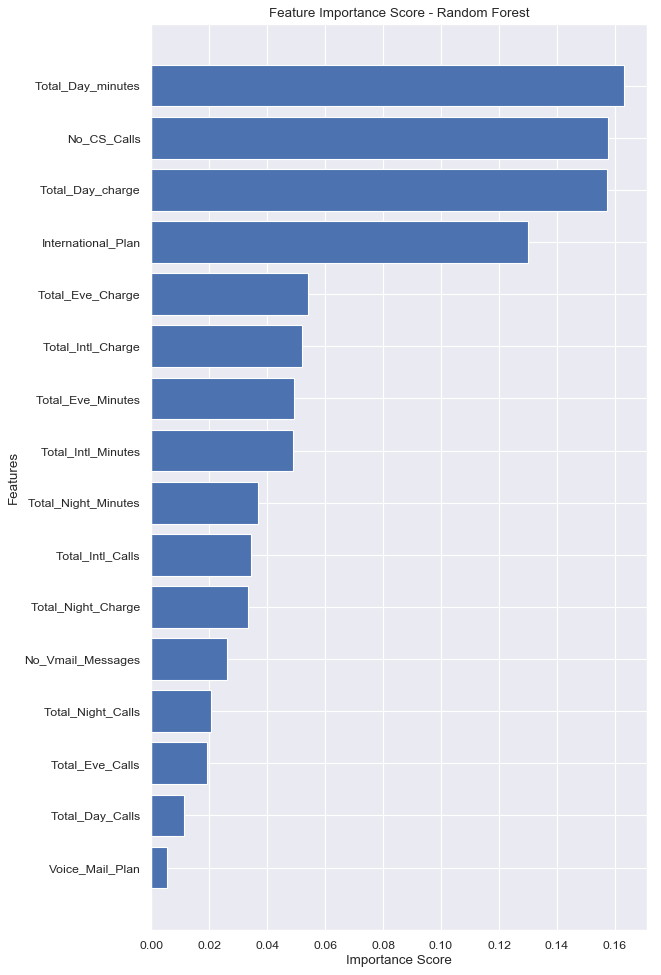

In [90]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

<font size="3"> 
<div class="alert alert-block alert-success">
    
As I look to add more datasets I was limited to add features as the background about the datasets is limited.<br><br>
The following datasets is subset of some big datasets which the information is limited. <br><br>

- If we have high variance, We should reduce the number of variables to minimize overfitting.<br><br>
- Adjust N <br><br>
- use the top N positive and negative features. <br><br> 
- even top N important random forest features.<br><br>
- PCA (principle component analysis could be helpful.<br><br>
- Data leakage in cleaning process.(letting Machine to artifically cheat)<br><br>

</div>
     </font>  

# Model Selection: Hyperparameter Tuning

**Q35. Using your best baseline model, pick a hyperparameter and show its effect for a range of values (similar to what we did for the random forest and max_depths in the diabetes project.**

<font size="3"> 
<div class="alert alert-block alert-success">
- Hyperparameter Tuning is nothing but way to enhance our model by tweaking its parameter. <br><br>
- Think as knob in your old Radio buttoms of your old grandma Car.<br><br>
- Most of all Machine Learning models have basic components called hyper-parameters in it so that people like us tweak the model in and out to bosst that 0.01% prediction. <br><br>
- Sometime it gets little better result when we are competing for third degree increase between models. To do this we have to optimal setting of many variables in right combinations.<br><br>
- For example, what is the maximum depth for our random forest is hyperparameter tunning? <br><br>
- Each of these hyperparameters can be optimized to improve the model.<br><br>
- We can start with random number and once seen the output we can either decrease or increase these value to get good output of it.<br><br>
- max_depth controls the depth of the tree in Random forest.<br><br>
- Change the number of variables that are sampled at each split. 
- Use the AUC as the comparison metric.
</div>
     </font> 

In [91]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

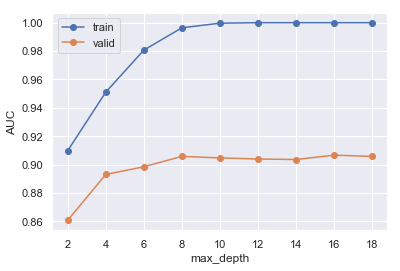

In [92]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

We inccrease the max_depth to improve the training performance but as we can see it flattens out after reaching to certain max depth. We also know that there are many hyperparameteres for each model and we can fine tune some of these components to optimise it.

Let's create a grid over a few of these (see the scikit-learn website for the descriptions).

In [93]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


**Q 36. Using RandomizedSearchCV, optimize a few of your baseline models. Note that GradientBoosting Classifier may take a while so you might need to adjust the number of iterations or specific parameters. If this takes too long on your computer, feel free to take that one out.**

To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. Here we will use the auc.

In [94]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [95]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

Three important parameters of RandomizedSearchCV are scoring, n_iter and cross-validation.If we increase more n_iter and cv then 
we will have more run time and one benefit we will decrease the overfitting.
By doing cross validation we wil get better estimate of our performance metrics. So lets keep that 2.


In [96]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   31.5s finished


33.0925350189209


In [97]:
rf_random.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 600}

In [122]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.974
Validation AUC:0.896
Optimized Random Forest
Training AUC:1.000
Validation AUC:0.903


The Validataion AUC score didn't change much at all. So we will check some other models to look for.

# Optimized SGDClassifier

In [99]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

1.2415211200714111


In [101]:
sgdc_random.best_params_

{'alpha': 0.001, 'max_iter': 200, 'penalty': 'none'}

In [102]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.840
Validation AUC:0.800
Optimized sgdc
Training AUC:0.843
Validation AUC:0.799


# Optimize Gradient Boosting Tree Classifier

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [104]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

5.249337673187256


In [105]:
gbc_random.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [106]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:1.000
Validation AUC:0.885
Optimized gbc
Training AUC:0.990
Validation AUC:0.892


# Model Selection: analyze optimization results

In [107]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [108]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.799850
1,SGD,optimized,0.798986
2,RF,baseline,0.895939
3,RF,optimized,0.902598
4,GB,baseline,0.884781
5,GB,optimized,0.892329


**Q38.Make a plot comparing the performance of the optimized models to the baseline models.**

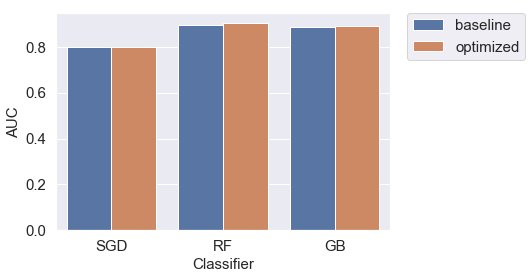

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

# Pick your best model

**Q39. Pick your best model. Explain why you picked it. Save the model using pickle.**

<font size="3"> 
<div class="alert alert-block alert-success">
    
- I have picked Random Forest as Best Model and below we are saving it using pickle dump. <br><br>
- The choice of Picking the Random Forest was because of the better AUC Score than rest of the models. <br><br>
- Also GB has more AUC score it seems like GB was overfitting my training data and doing poor on validation datasets. <br><br>
- I had no confidence that it might do well in Test Sets. <br><br>
- So I chose Random Forest than SGD and GB. Also becuase of better AUC Score. <br><br>

**Looking at some other Parameters to make me choose Random Forests:** <br><br>
- Gradient Boosting model shows the training score is perfectly good.<br><br>
- Large difference between the training and validation scores. <br><br>
- Sign of overfitting.<br><br>
- The model has a high variance. <br><br>
- Not possible to add more samples. <br><br>
-  Hence, I consider RF with optimized hyperparameter is my best model here.<br><br>

</div>
     </font> 

In [110]:
pickle.dump(sgdc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [112]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))


In [113]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [114]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

#### Calculate prediction probabilities

In [115]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

#### Evaluate the Performance

In [116]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.843
accuracy:0.776
recall:0.762
precision:0.784
specificity:0.790
prevalence:0.500
 
Validation:
AUC:0.799
accuracy:0.776
recall:0.740
precision:0.336
specificity:0.781
prevalence:0.131
 
Test:
AUC:0.832
accuracy:0.803
recall:0.746
precision:0.386
specificity:0.812
prevalence:0.137
 


Plot the ROC curve

**Q40. evaluate the performance of your best model on the training, validation and test sets. Make an ROC curve too.**

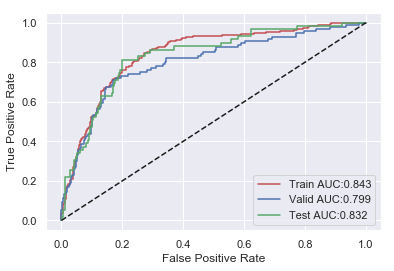

In [117]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

ROC curve helps to determine True Positive Rate(TPR) vs the False Positive Rate(FPR).

# Conclusion

** Q41.Briefly summarize your project and describe your performance as if you were talking to a CEO.**

<font size="3"> 
<div class="alert alert-block alert-success">
    
    
I began this whole Project by looking Telecom Datasets with the intent of finding necessary relationship and info about different varaiables so that we can Predict the Churn even before it happens. The Key findings and the best Model was Random Forest. Below I have mentioned Why choosing Random Forest is better for this given Datasets given the condition and results. <br><br>
    
**How does the Random Forest model Works? and Why Its better Model than Any other Model for Predicting Customer Churn Analysis** <br><br>

- Random Forest model are better to reduce high variance which tend to overfit by averaging many trees.<br><br>
- It might produce little bias because of that but overall it reduces high variance.

- In Random Forest Model instead of using only one tree, it will use many trees(forests) with different variable options to make our new model. <br><br>

- Then for each observation that it encounters from each node, it choose their category by taking the majority vote of different trees.<br><br>

- Based on my observation of data and results it would have been lot easier to interpret linear classifier than non linear models. The biggest disadvantage of being linear would be to have high bias towards fitting non linear model. <br><br>

- One of the advantage of Random Forest was it can work with highly corelated features. It can deal with non-linearrties much better than logistic Regression. <br><br>

- **Sesntivity (Measure of True Positive Rate(TPR) or Recall (TP/(TP+FN)): 74% which states that Random Forest Model is 74% accurate in identifying True Positives. That means with this model we can predcit 74% of time who will Churn before hand with current features.** <br><br>

- If you see the ROC curve we can say that it is doing far better than random guessing. <br><br>

- Lets Look at AUC which is 0.832 which is much better than our baseline model 0.5 <br><br>

- To make prediction it uses multiple decission trees which is more effective than single decission tree.<br><br>
- The data with low bias and high variance (non-linear relationships) can be handled properly and efficiently.<br><br>


</div>
     </font> 



In [118]:
display (Markdown('Senstivity (Measure of True Positive Rate(TPR) or Recall (TP/(TP+FN)):<span style="color: #ff0000">74% which states that Random Forest Model is 74% accurate in identifying True Positives. That means with this model we can predcit 74% of time who will Churn before hand with current features.</span>'))

Senstivity (Measure of True Positive Rate(TPR) or Recall (TP/(TP+FN)):<span style="color: #ff0000">74% which states that Random Forest Model is 74% accurate in identifying True Positives. That means with this model we can predcit 74% of time who will Churn before hand with current features.</span>